In [2]:
# Comparing image using ORB/SIFT feature detectors
from skimage.metrics import structural_similarity
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#images could be in diffrent dimension
def orb_sim(img1, img2):
    orb = cv2.ORB_create()
    
    #detect keypoints and descriptors
    kp_a, desc_a = orb.detectAndCompute(img1, None)
    kp_b, desc_b = orb.detectAndCompute(img2, None)
    
    #define the bruteforce matcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
    #perform matches.
    matches = bf.match(desc_a, desc_b)
    
    #looking for similar regions with distance<50
    similar_regions = [i for i in matches if i.distance < 50]
    if len(matches) == 0:
        return 0
    return len(similar_regions)/len(matches)

In [21]:
#images should be same dimension
def structural_sim(img1, img2):
    sim, diff = structural_similarity(img1, img2, full=True, multichannel=True)
    return sim

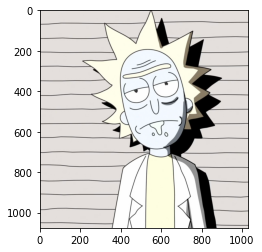

In [11]:
img1 = cv2.imread('Rick-original.png')
img2 = cv2.imread('Rick-rotated.png')
img3 = cv2.imread('Rick-rotated2.png')
img4 = cv2.imread('Rick2.jpg')
img5 = cv2.imread('Rick3.jpg')

plt.imshow(img1)

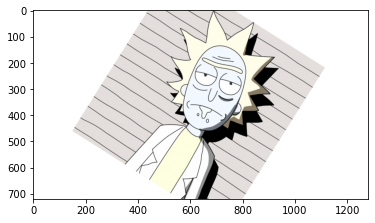

In [7]:
plt.imshow(img2)

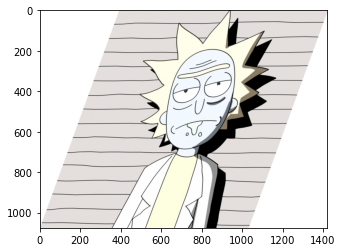

In [8]:
plt.imshow(img3)

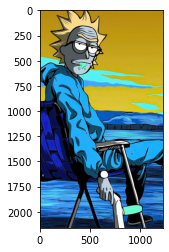

In [12]:
plt.imshow(img4)

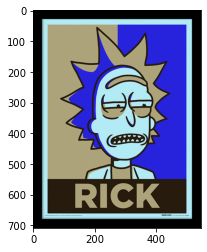

In [13]:
plt.imshow(img5)

In [18]:
# 1.0 means completely identical
# 0.0 means not

orb_similarity = orb_sim(img1, img1)
print("Similarity between img1 & img1 using ORB is: ", orb_similarity)

orb_similarity = orb_sim(img1, img2)
print("Similarity between img1 & img2 using ORB is: ", orb_similarity)

orb_similarity = orb_sim(img1, img3)
print("Similarity between img1 & img3 using ORB is: ", orb_similarity)

orb_similarity = orb_sim(img1, img4)
print("Similarity between img1 & img3 using ORB is: ", orb_similarity)

orb_similarity = orb_sim(img1, img5)
print("Similarity between img1 & img4 using ORB is: ", orb_similarity)

Similarity between img1 & img1 using ORB is:  1.0
Similarity between img1 & img2 using ORB is:  0.9753086419753086
Similarity between img1 & img3 using ORB is:  0.9227272727272727
Similarity between img1 & img3 using ORB is:  0.24545454545454545
Similarity between img1 & img4 using ORB is:  0.19387755102040816


In [26]:
# SSIM
from skimage.transform import resize
img2_resize = resize(img2, (img1.shape[0], img1.shape[1]), anti_aliasing=True)
img3_resize = resize(img3, (img1.shape[0], img1.shape[1]), anti_aliasing=True)
img4_resize = resize(img4, (img1.shape[0], img1.shape[1]), anti_aliasing=True)
img5_resize = resize(img5, (img1.shape[0], img1.shape[1]), anti_aliasing=True)

ssim = structural_sim(img1, img1)
print("Similarity between img1 & img1 using SSIM is: ", ssim)

ssim = structural_sim(img1, img2_resize)
print("Similarity between img1 & img2_resize using SSIM is: ", ssim)

ssim = structural_sim(img1, img3_resize)
print("Similarity between img1 & img3_resize using SSIM is: ", ssim)

ssim = structural_sim(img1, img4_resize)
print("Similarity between img1 & img4_resize using SSIM is: ", ssim)

ssim = structural_sim(img1, img5_resize)
print("Similarity between img1 & img5_resize using SSIM is: ", ssim)

Similarity between img1 & img1 using SSIM is:  1.0
Similarity between img1 & img2_resize using SSIM is:  0.04490354765346133
Similarity between img1 & img3_resize using SSIM is:  0.04506263761804711
Similarity between img1 & img4_resize using SSIM is:  0.04316160401856925
Similarity between img1 & img5_resize using SSIM is:  0.04325020133818505
